In [75]:
import pandas as pd
import geopandas as geopd
import argparse
import numpy as np
import seaborn as sns

In [67]:
stops = geopd.read_file("/home/data/results/climate_risk/stops_NRI_FSF.geojson")

In [72]:
stops["high_freq"] = stops["CFLD_AFREQ"] > 1

In [73]:
stops.groupby("high_freq").agg(avg_risk = ("risk_score", "mean"))

,avg_risk
high_freq,
False,1.579357
True,2.626194


In [76]:
np.corrcoef(stops["CFLD_AFREQ"], stops["risk_score"])

array([[1.        , 0.33396473],
       [0.33396473, 1.        ]])

In [79]:
np.corrcoef(stops["CFLD_EALB"], stops["risk_score"])

array([[1.        , 0.20992828],
       [0.20992828, 1.        ]])

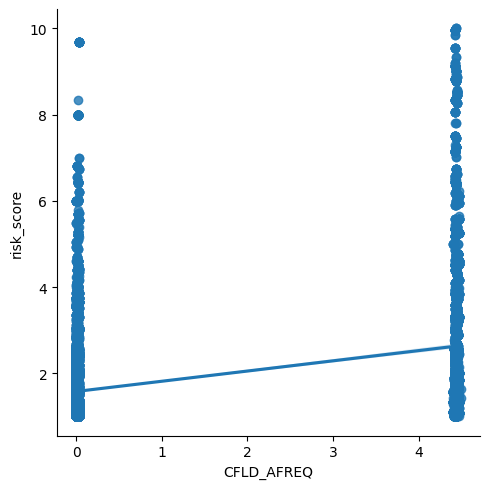

In [77]:
sns.lmplot(x = "CFLD_AFREQ", y = "risk_score", data = stops)

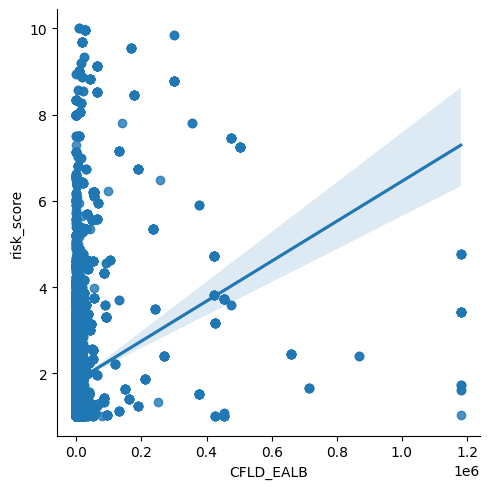

In [78]:
sns.lmplot(x = "CFLD_EALB", y = "risk_score", data = stops)

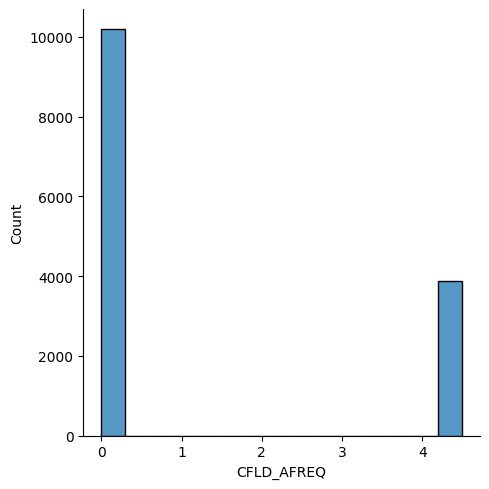

In [91]:
sns.displot(x = "CFLD_AFREQ", data = stops)

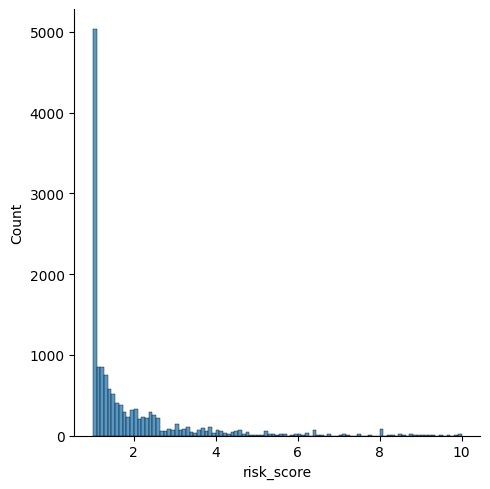

In [84]:
sns.displot(x = "risk_score", data = stops)

In [102]:
stops["pct_moderate_plus"] = stops["count_moderate"] + stops["count_major"] + stops["count_severe"] + stops["count_extreme"]
stops["risk_category"] = pd.cut(stops["pct_moderate_plus"], bins = [-1, 0, .15, 1], labels = ["Low", "Medium", "High"])
stops["risk_category"]

0           Low
1           Low
2           Low
3           Low
4           Low
          ...  
14064    Medium
14065    Medium
14066    Medium
14067    Medium
14068    Medium
Name: risk_category, Length: 14069, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [104]:
stops["pct_moderate_plus"]

0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
14064    0.054039
14065    0.020677
14066    0.020677
14067    0.012315
14068    0.012315
Name: pct_moderate_plus, Length: 14069, dtype: float64

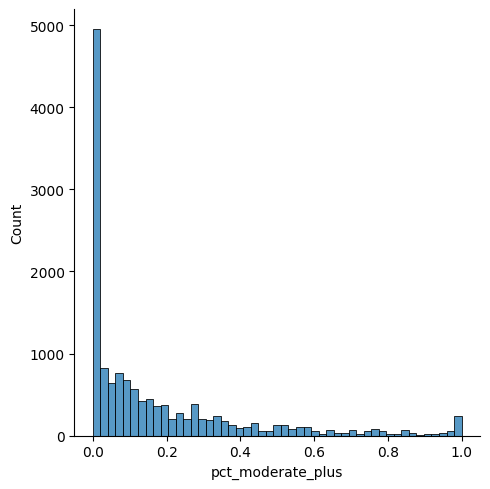

In [98]:
sns.displot(x = "pct_moderate_plus", data = stops)

In [99]:
stops.pct_moderate_plus.describe()

count    14069.000000
mean         0.172046
std          0.233759
min          0.000000
25%          0.000000
50%          0.077181
75%          0.249167
max          1.000000
Name: pct_moderate_plus, dtype: float64